In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, precision_score,accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold

plt.style.use('ggplot')

In [4]:
df = pd.read_csv("../data/pseudo_facebook.csv")
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [5]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [6]:
df.describe()


,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [7]:
df.columns


Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [8]:
df.value_counts()

userid   age  dob_day  dob_year  dob_month  gender  tenure  friend_count  friendships_initiated  likes  likes_received  mobile_likes  mobile_likes_received  www_likes  www_likes_received
1000008  14   9        1999      9          female  343.0   1156          233                    431    198             400           167                    31         31                    1
1796628  28   10       1985      11         male    35.0    27            18                     312    28              312           22                     0          6                     1
1796307  36   25       1977      12         male    558.0   41            29                     0      0               0             0                      0          0                     1
1796297  39   15       1974      11         male    1462.0  956           579                    106    41              0             18                     106        23                    1
1796292  30   2        1983      11         m

In [9]:
df['friend_accept_rate'] = df['friend_count'] / df['friendships_initiated']
df['friend_accept_rate']
df['friend_accept_rate'].fillna(0, inplace=True)

In [10]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
friend_accept_rate         0
dtype: int64

In [11]:
df['tenure'].fillna(df['tenure'].mean(), inplace = True)

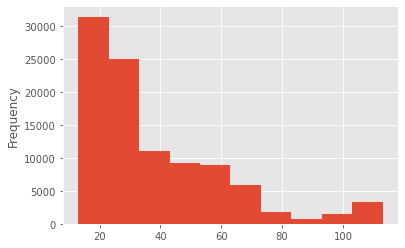

In [12]:
df['age'].plot(kind='hist')
plt.show()


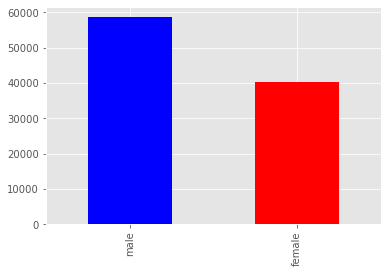

In [13]:
df['gender'].value_counts().plot(kind='bar',color = ['blue','red'])

plt.show()


In [14]:
males = df['gender'] == "male"
females = df['gender'] == "female"


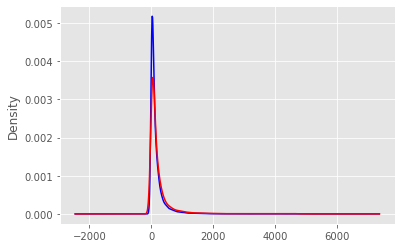

In [15]:
fig,ax = plt.subplots()
ax1=df[males].friend_count.plot(kind='density', color='blue')
ax2=df[females].friend_count.plot(kind='density',color = 'red')

plt.show()

In [16]:
df[males].friend_count.mean()

165.03545941885477

In [17]:
df[females].friend_count.mean()

241.96994087544095

In [18]:
df[males].friendships_initiated.mean()

103.06659951514324

In [19]:
df[females].friendships_initiated.mean()

113.89909077358772

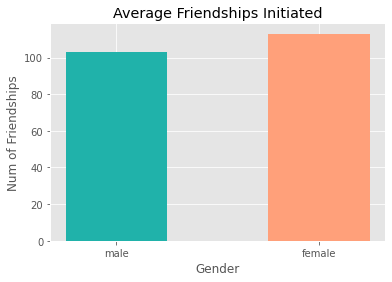

In [133]:
data = {'male': int(df[males].friendships_initiated.mean()), 'female': int(df[females].friendships_initiated.mean())}
gender = list(data.keys())
values = list(data.values())
colors = ['lightseagreen', 'lightsalmon']
fig, ax = plt.subplots()
plt.bar(gender, values, color=colors,width = .5)
plt.xlabel("Gender")
plt.ylabel("Num of Friendships")
plt.title('Average Friendships Initiated')

plt.show()

In [21]:
validation_dat = df[df['gender'].isnull() | df['gender'].isnull()]
validation_dat= validation_dat.drop(columns = ['friend_accept_rate', 'gender'])


In [22]:
training_dat = df[~(df['userid'].isin(validation_dat['userid']))]
training_dat

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_accept_rate
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.000000
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,0.000000
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,0.000000
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,0.000000
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202,6.211144
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,1.144186
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,1.313648
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756,13.837838


In [23]:
Gender = {'male': 0, 'female': 1}
training_dat['gender'] = [Gender[item] for item in training_dat['gender']]
training_dat

/Users/nicolacave/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,friend_accept_rate
0,2094382,14,19,1999,11,0,266.0,0,0,0,0,0,0,0,0,0.000000
1,1192601,14,2,1999,11,1,6.0,0,0,0,0,0,0,0,0,0.000000
2,2083884,14,16,1999,11,0,13.0,0,0,0,0,0,0,0,0,0.000000
3,1203168,14,25,1999,12,1,93.0,0,0,0,0,0,0,0,0,0.000000
4,1733186,14,4,1999,12,0,82.0,0,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,1,541.0,2118,341,3996,18089,3505,11887,491,6202,6.211144
98999,1256153,18,12,1995,3,1,21.0,1968,1720,4401,13412,4399,10592,2,2820,1.144186
99000,1195943,15,10,1998,5,1,111.0,2002,1524,11959,12554,11959,11462,0,1092,1.313648
99001,1468023,23,11,1990,4,1,416.0,2560,185,4506,6516,4506,5760,0,756,13.837838


In [56]:
X = training_dat.drop(columns = ['userid','gender','friend_accept_rate'])
y = training_dat['gender']


# kf = KFold(n_splits=2)
# kf.get_n_splits(X)

# print(kf)
# KFold(n_splits=2, random_state=None, shuffle=False)
# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [25]:
X

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14,19,1999,11,266.0,0,0,0,0,0,0,0,0
1,14,2,1999,11,6.0,0,0,0,0,0,0,0,0
2,14,16,1999,11,13.0,0,0,0,0,0,0,0,0
3,14,25,1999,12,93.0,0,0,0,0,0,0,0,0
4,14,4,1999,12,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,68,4,1945,4,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,18,12,1995,3,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,15,10,1998,5,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,23,11,1990,4,416.0,2560,185,4506,6516,4506,5760,0,756


In [26]:
# [x.unique() for x in X_train.columns]
X_train.describe()

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,74121.000000,74121.00000,74121.000000,74121.000000,74121.000000,74121.00000,74121.000000,74121.000000,74121.000000,74121.000000,74121.000000,74121.000000,74121.000000
mean,37.260682,14.54380,1975.739318,6.290484,537.703603,196.16299,107.736660,156.085995,137.632695,105.700814,81.410032,50.385127,56.222609
std,22.554140,9.02302,22.554140,3.527589,456.135030,383.83787,188.157539,565.682241,1328.936022,433.782820,807.522193,290.071461,579.086668
min,13.000000,1.00000,1900.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.00000,1963.000000,3.000000,227.000000,31.00000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.00000,1985.000000,6.000000,412.000000,82.00000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.00000,1992.000000,9.000000,676.000000,207.00000,117.000000,82.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.00000,2000.000000,12.000000,3139.000000,4923.00000,4144.000000,21652.000000,261197.000000,21652.000000,138561.000000,14865.000000,129953.000000


In [123]:
log = LogisticRegression()
rfor = RandomForestClassifier()
gbfor= GradientBoostingClassifier(learning_rate=0.2, max_depth=3, )
kn = KNeighborsClassifier(n_neighbors=15)
svm = SVC()



log.fit(X_train, y_train)
rfor.fit(X_train,y_train)
kn.fit(X_train, y_train)
svm.fit(X_train,y_train)

/Users/nicolacave/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [ ]:
kn

In [125]:
gbfor= GradientBoostingClassifier(n_estimators = 1000,learning_rate=0.01, max_depth=2)
gbfor.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=2, n_estimators=1000)

In [126]:
y_pred = log.predict(X_test)
fory_pred = rfor.predict(X_test)
gb_pred = gbfor.predict(X_test)
kn_pred = kn.predict(X_test)

In [127]:
print(f'Test Score:{rfor.score(X_test,y_test)}')
print(f'Train Score:{rfor.score(X_train,y_train)}')

Test Score:0.6853928036588821
Train Score:1.0


In [128]:
print(f'Test Score:{log.score(X_test,y_test)}')
print(f'Train score:{log.score(X_train,y_train)}')


Test Score:0.6457684057149795
Train score:0.6381997004897397


In [129]:
print(accuracy_score(y_test,gb_pred))
print(recall_score(y_test,gb_pred))
print(precision_score(y_test,gb_pred))


0.6889545472942891
0.47219983883964545
0.6572269732230478


In [130]:
print(f'Test Score:{kn.score(X_test,y_test)}')
print(f'Train score:{kn.score(X_train,y_train)}')

Test Score:0.6742218804387421
Train score:0.7142375305244127


In [131]:
print(f'Test Score:{gbfor.score(X_test,y_test)}')
print(f'Train score:{gbfor.score(X_train,y_train)}')



Test Score:0.6889545472942891
Train score:0.6929480174309575


In [34]:
validation_dat=validation_dat.drop(columns=['userid'],axis=1)

In [36]:
yval_pred= log.predict(validation_dat)
yval_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

array([[13607,   998],
       [ 7925,  2177]])

In [132]:
print(f'rf accuracy: {accuracy_score(y_test, fory_pred)}')
print(f'log accuracy: {accuracy_score(y_test, y_pred)}')
print(f'gb accuracy: {accuracy_score(y_test, gb_pred)}')
print(f'kn accuracy: {accuracy_score(y_test, kn_pred)}')

rf accuracy: 0.6853928036588821
log accuracy: 0.6457684057149795
gb accuracy: 0.6889545472942891
kn accuracy: 0.6742218804387421
